<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
### <font color='blue'>Modelagem de Séries Temporais e Real-Time Analytics com Apache Spark e Databricks</font>
### <font color='blue'>Projeto 1 - Tarefa 4</font>
### <font color='blue'>Prevendo Usuários Ativos em Um Web Site</font>

## Instalando e Carregando os Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [2]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports para análise de dados
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Filtra os warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Formatação para os gráficos e tabelas
plt.style.use('ggplot')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
# Formatando os labels dos gráficos
from pylab import rcParams
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['text.color'] = 'k'
rcParams['figure.figsize'] = 18, 8
plt.style.use('fivethirtyeight')

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



## Carregando o Conjunto de Dados

In [6]:
# Carrega os dados
# Observe que estamos carregando os dados e já definindo a data como índice com o parâmetro index_col = 0
dados = pd.read_csv('dataset.csv', 
                    header = None, 
                    index_col = 0,
                    names = ['usuarios_ativos'])

In [7]:
# Série
dados.head()

,usuarios_ativos
2013-01,110
2013-02,121
2013-03,135
2013-04,127
2013-05,128


## Suavização Através da Média Móvel Simples

- Calculamos a média de valores 'k' consecutivos, dependendo da frequência da série temporal.
- Aqui podemos calcular a média do último 1 ano, ou seja, os últimos 12 valores.
- Uma desvantagem dessa abordagem específica é que o período de tempo deve ser estritamente definido.

In [8]:
# Primeiro, vamos calcular a média da série (essa não é a média móvel, mas sim a média total)
dados.mean()

usuarios_ativos    280.416667
dtype: float64

In [9]:
# Vamos criar uma cópia da série original pois isso será importante mais tarde
df_serie = dados.copy()

In [10]:
type(dados)

pandas.core.frame.DataFrame

In [11]:
# Agora definimos uma janela de 12 meses da série temporal para calcular a média móvel
# Vamos gravar o resultado em outra coluna no próprio dataset
dados['usuarios_ativos_media_movel_simples'] = dados.rolling(window = 12).mean()

In [12]:
# Imprime o dataset 
dados

,usuarios_ativos,usuarios_ativos_media_movel_simples
2013-01,110,NaN
2013-02,121,NaN
2013-03,135,NaN
2013-04,127,NaN
2013-05,128,NaN
...,...,...
2024-08,606,463.333333
2024-09,508,467.083333
2024-10,461,471.583333
2024-11,390,473.916667


Agora temos duas colunas e alguns valores NaN na coluna das médias móveis. Isso é normal e esperado, afinal, calculamos a média de 12 valores consecutivos "deslizando" a janela pela série e para alguns valores (os primeiros da série) não teremos como calcular a média dos 12 valores anteriores e assim eles ficam como NaN. Ou seja, perdemos registros da série ao aplicar esta técnica de suavização.

In [13]:
# Primeiros 20 registros da série
dados.head(20)

,usuarios_ativos,usuarios_ativos_media_movel_simples
2013-01,110,NaN
2013-02,121,NaN
2013-03,135,NaN
2013-04,127,NaN
2013-05,128,NaN
2013-06,136,NaN
2013-07,149,NaN
2013-08,150,NaN
2013-09,138,NaN
2013-10,119,NaN


In [14]:
# Últimos 20 registros da série
dados.tail(20)

,usuarios_ativos,usuarios_ativos_media_movel_simples
2023-05,420,397.083333
2023-06,472,400.166667
2023-07,548,404.916667
2023-08,559,409.416667
2023-09,463,414.333333
2023-10,407,418.333333
2023-11,362,422.666667
2023-12,405,428.333333
2024-01,417,433.083333
2024-02,391,437.166667


Vamos plotar a série original e a série suavizada com a média móvel:

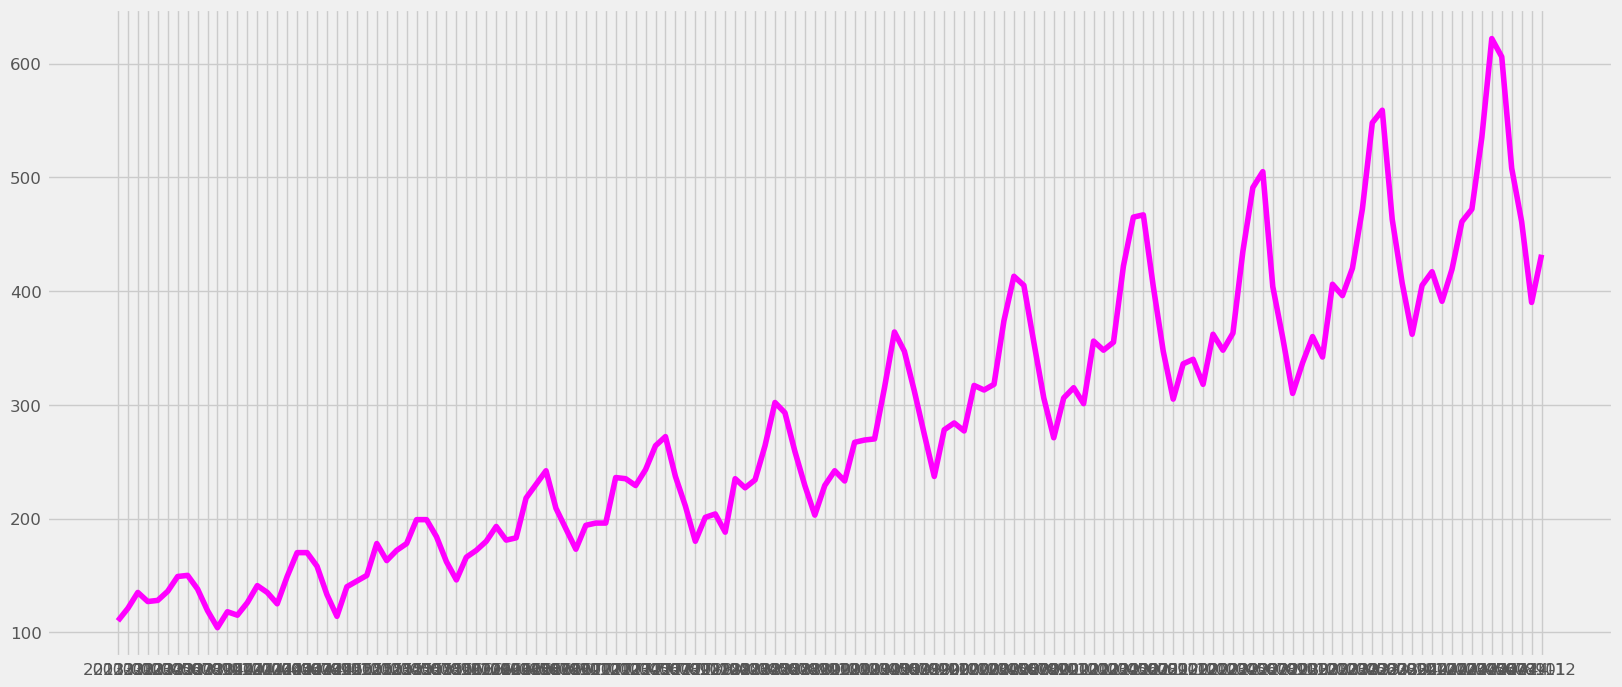

In [15]:
# Plot da série original
plt.plot(dados['usuarios_ativos'], color = 'magenta')
plt.show();

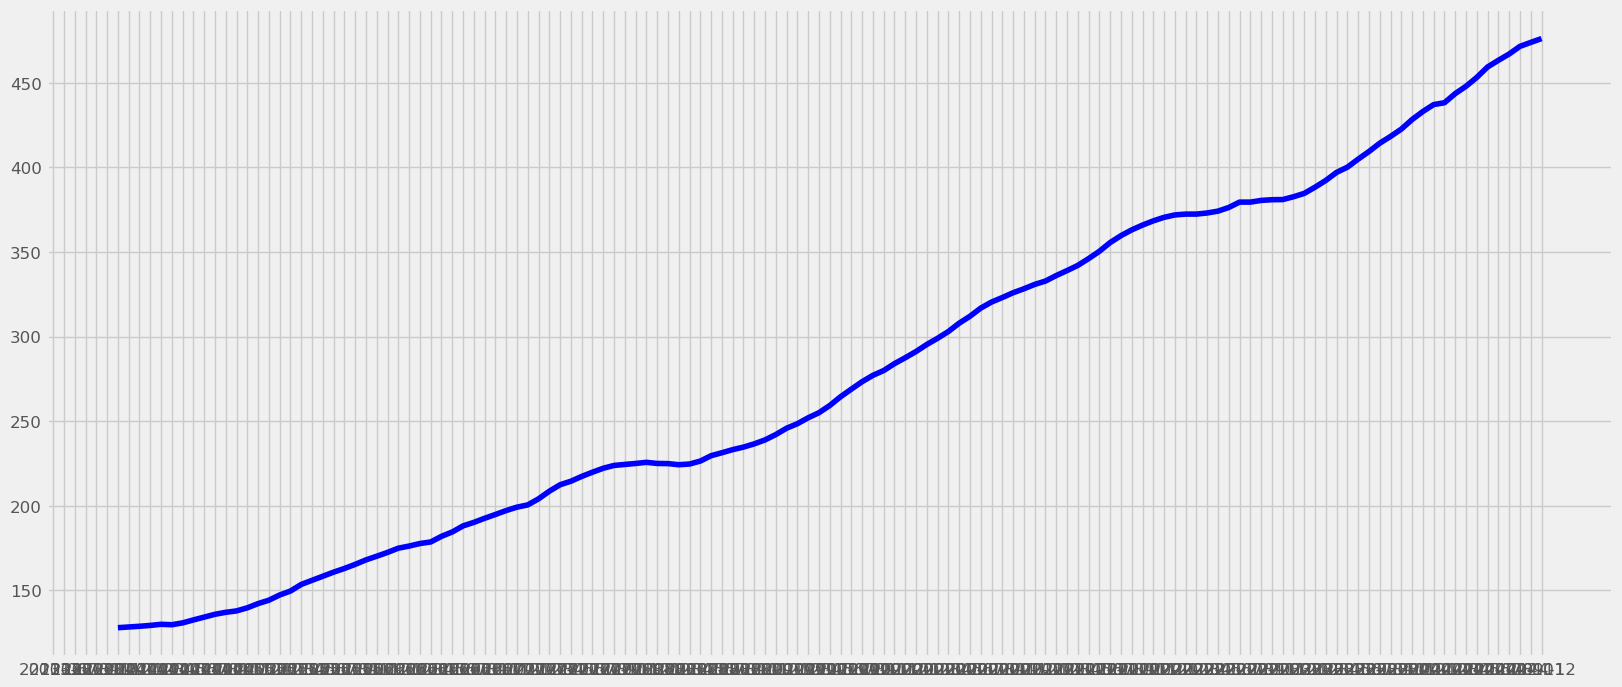

In [16]:
# Plot da série suavizada
plt.plot(dados['usuarios_ativos_media_movel_simples'], color = 'blue')
plt.show();

A diferença é grande, não é? Vamos colocar as duas juntas agora.

In [17]:
dados.tail()

,usuarios_ativos,usuarios_ativos_media_movel_simples
2024-08,606,463.333333
2024-09,508,467.083333
2024-10,461,471.583333
2024-11,390,473.916667
2024-12,432,476.166667


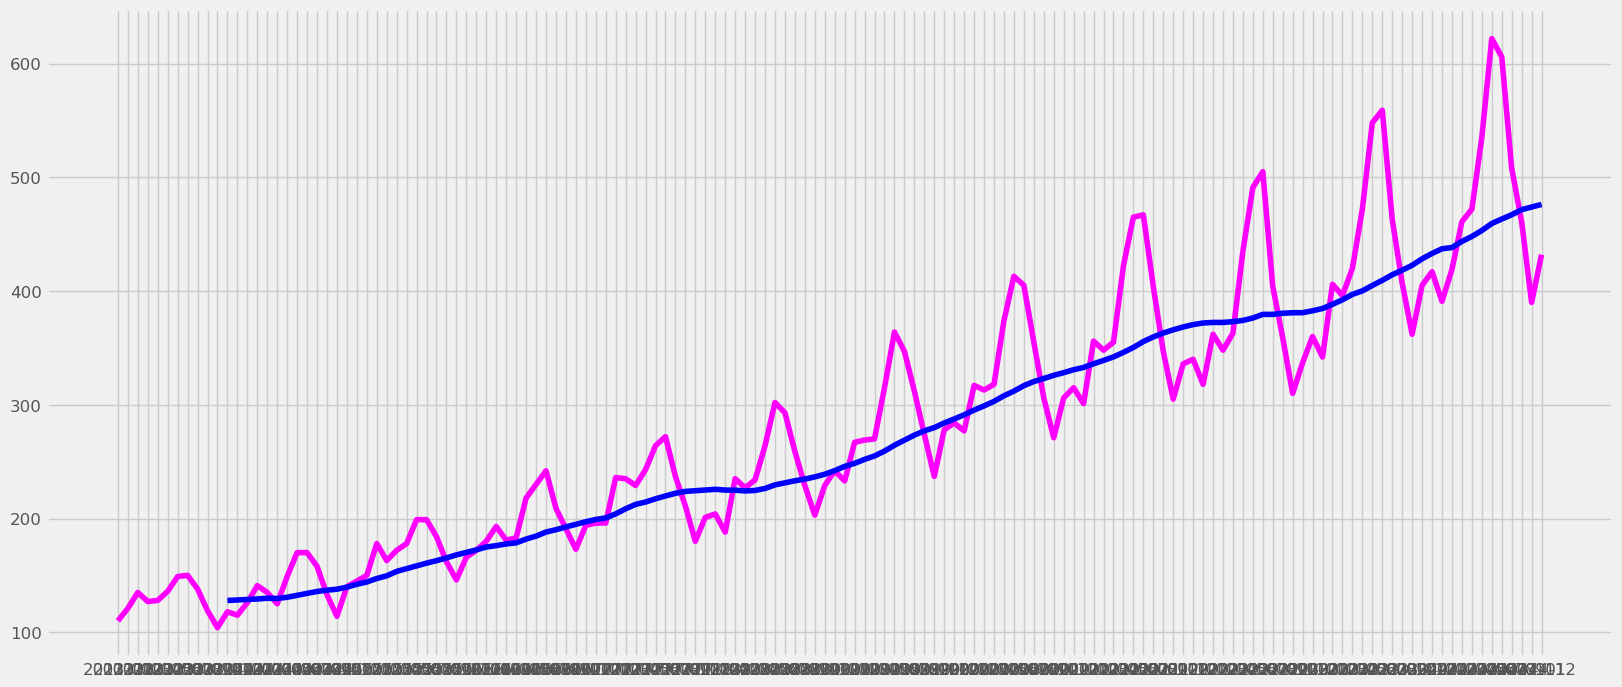

In [18]:
# Agora as duas juntas
plt.plot(dados['usuarios_ativos'], color = 'magenta')
plt.plot(dados['usuarios_ativos_media_movel_simples'], color = 'blue')
plt.show();

Vamos remover a tendência da série original e deixar apenas a sazonalidade.

In [19]:
# Calculando a diferença entre a série original e a série suavizada
diff_original_suavizada = dados['usuarios_ativos'] - dados['usuarios_ativos_media_movel_simples']
diff_original_suavizada.tail(20)

2023-05     22.916667
2023-06     71.833333
2023-07    143.083333
2023-08    149.583333
2023-09     48.666667
2023-10    -11.333333
2023-11    -60.666667
2023-12    -23.333333
2024-01    -16.083333
2024-02    -46.166667
2024-03    -19.250000
2024-04     17.333333
2024-05     24.000000
2024-06     81.750000
2024-07    162.583333
2024-08    142.666667
2024-09     40.916667
2024-10    -10.583333
2024-11    -83.916667
2024-12    -44.166667
dtype: float64

In [20]:
# Vamos remover os valores NA para testar a estacionaridade
diff_original_suavizada.dropna(inplace = True)

In [21]:
# Função para testar a estacionaridade
def dsa_testa_estacionaridade(serie):
    
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    
    # Plot
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

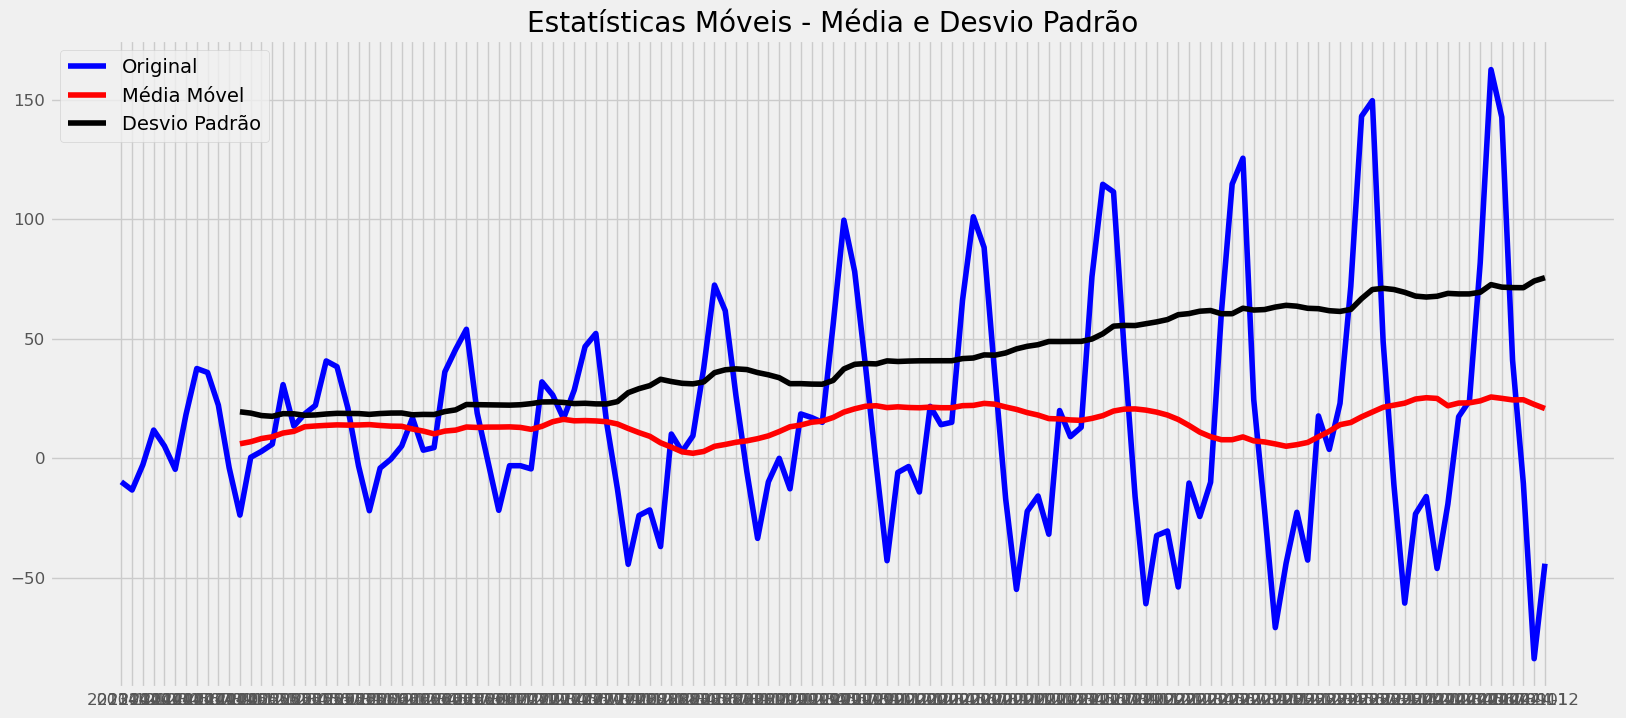


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -3.155457
Valor-p                           0.022712
Número de Lags Consideradas      13.000000
Número de Observações Usadas    119.000000
Valor Crítico (1%)               -3.486535
Valor Crítico (5%)               -2.886151
Valor Crítico (10%)              -2.579896
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [22]:
# Executando o teste de estacionaridade
dsa_testa_estacionaridade(diff_original_suavizada)

Aplicamos a suavização e extraímos a tendência da série. Esta série foi transformada e já poderíamos usá-la para modelagem estatística. Mas temos um problema. Perdemos uma parte dos dados, parte essa que poderia ser importante para prever o comportamento futuro.

Vamos testar outra técnica de suavização e verificar se temos sucesso sem perder tantos dados.

### Suavização Através da Média Móvel Ponderada Exponencial

- Para superar o problema de escolher uma janela definida na média móvel, podemos usar a média móvel ponderada exponencial.
- Adotamos uma "média móvel ponderada", em que valores mais recentes recebem um peso maior.
- Pode haver muitas técnicas para atribuir pesos. Uma popular é a média móvel ponderada exponencialmente em que os pesos são atribuídos a todos os valores anteriores com um fator de redução.

A função ewm() do Pandas permite aplicar esse método com facilidade.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html

In [23]:
# Aplicando suavização exponencial
# Observe que estamos aplicando a suavização à série original (antes de aplicar a suavização anterior)
serie_suavizada_exp = df_serie.ewm(alpha = 0.2, adjust = True).mean()

In [24]:
serie_suavizada_exp

,usuarios_ativos
2013-01,110.000000
2013-02,116.111111
2013-03,123.852459
2013-04,124.918699
2013-05,125.835317
...,...
2024-08,512.214093
2024-09,511.371274
2024-10,501.297019
2024-11,479.037615


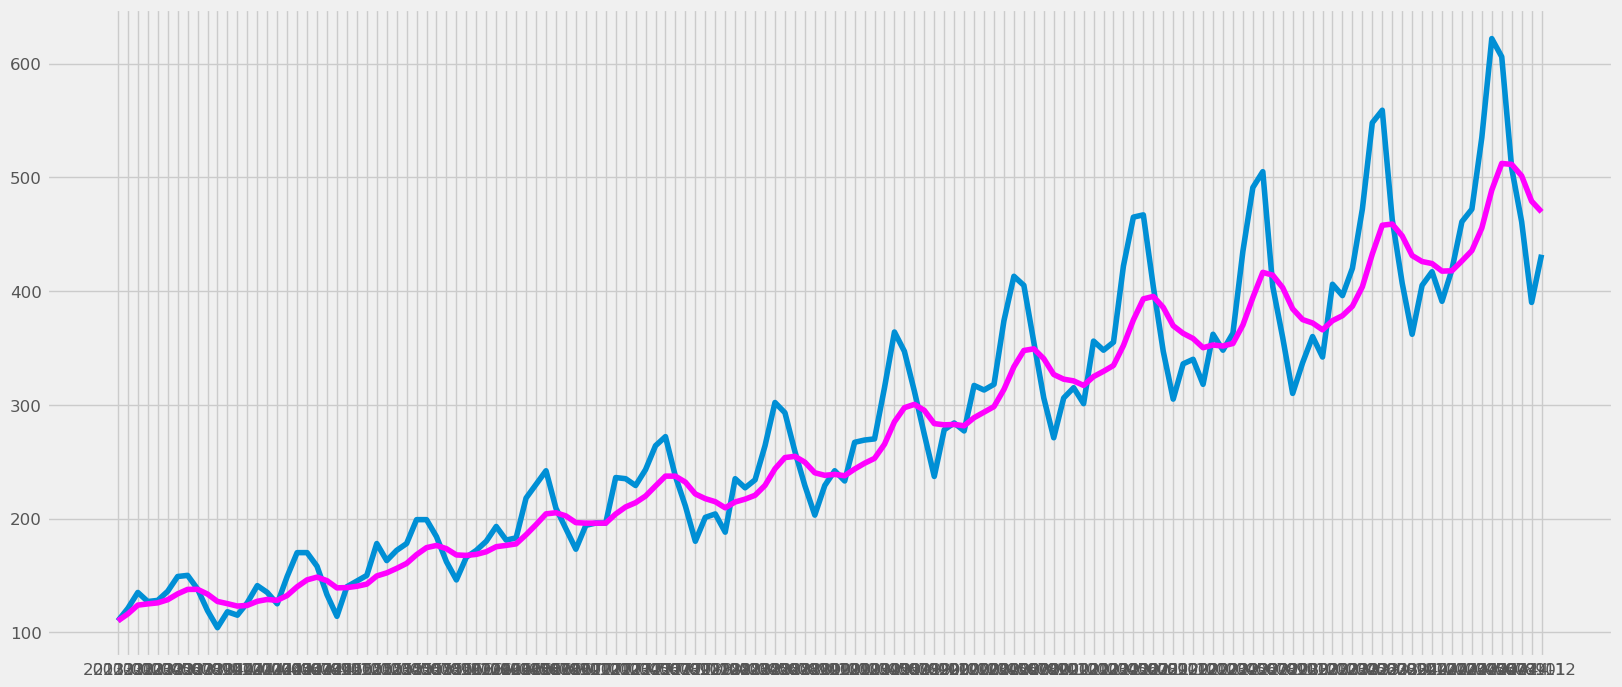

In [25]:
# Plt das séries
plt.plot(df_serie)
plt.plot(serie_suavizada_exp, color = 'magenta')
plt.show();

Suavização aplicada. Vamos agora calcular a diferença e aplicar o teste de estacionaridade.

In [26]:
df_serie.tail()

,usuarios_ativos
2024-08,606
2024-09,508
2024-10,461
2024-11,390
2024-12,432


In [27]:
# Diferença
diff_original_suav_exp = df_serie.usuarios_ativos - serie_suavizada_exp.usuarios_ativos

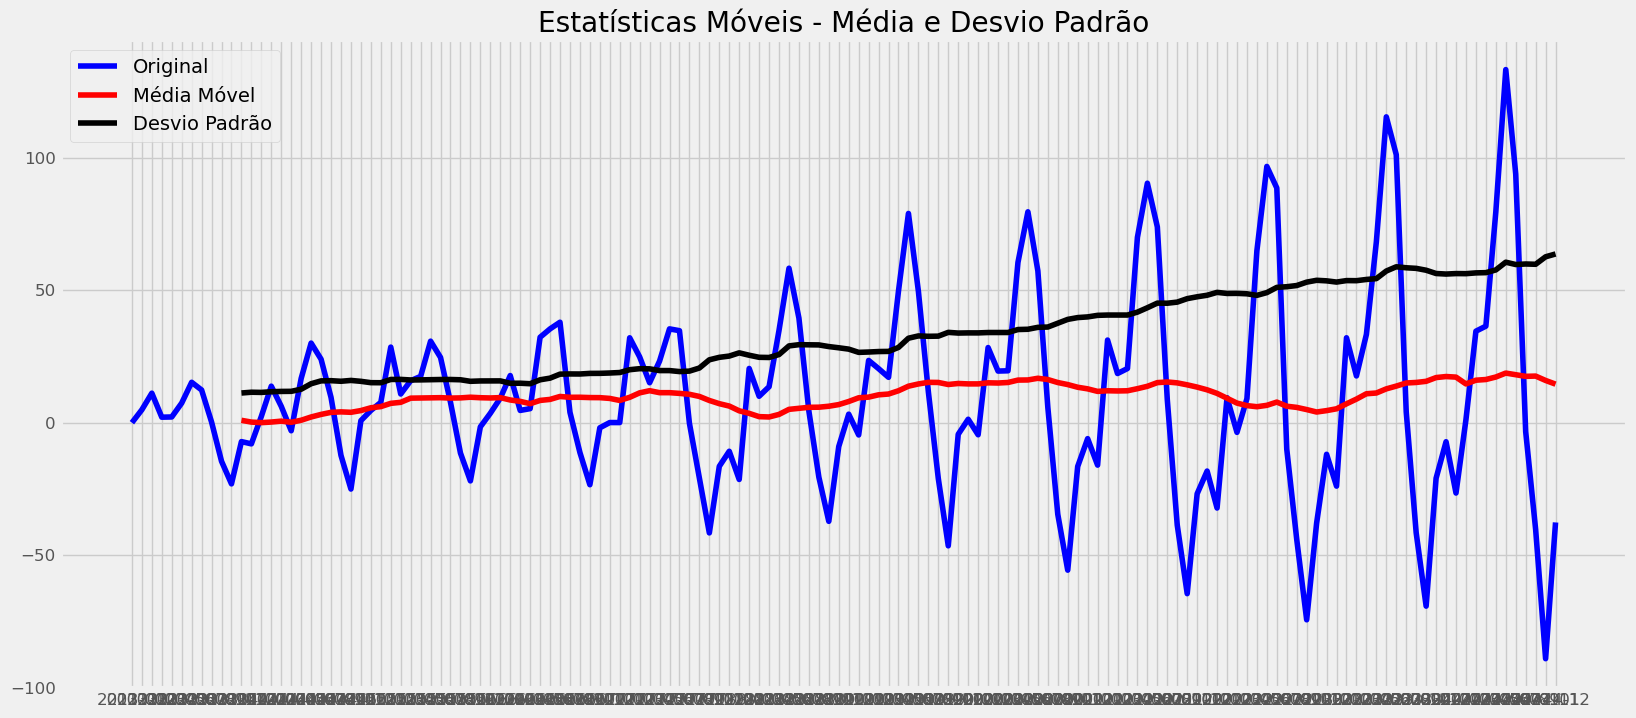


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -2.835903
Valor-p                           0.053325
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [28]:
# Executando o teste de estacionaridade
dsa_testa_estacionaridade(diff_original_suav_exp)

Perceba que a Suavização Exponencial não foi suficiente para deixar a série estacionária.

Com a suavização por média móvel simples podemos transformar nossa série em estacionária, mas perdemos dados. 

Com a suavização por média móvel exponencial não perdemos dados, mas não convertemos a série em estacionária. 

As técnicas de suavização não funcionam em todos os casos, principalmente nos de alta sazonalidade. Para esses casos precisamos da Diferenciação, tema da próxima aula.

In [29]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [30]:
#%watermark -v -m

In [31]:
#%watermark --iversions

# Fim da Tarefa 4